## import neccesary libraries and data files

In [1]:
!pip install psycopg2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 5.8 kB/s eta 0:00:0000:0200:03
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.9-cp39-cp39-macosx_10_9_x86_64.whl size=133936 sha256=161f2b74ed7d7caeb33979704c4ce4ecf1ffb552abf1620b6c110d0cfcba8eaf
  Stored in directory: /Users/isaacige/Library/Caches/pip/wheels/4d/77/79/f0a17b3972dc10befe94b9967d6dbe1de86ec0291b4b8631a4
Successfully built psycopg2


In [2]:
import pandas as pd
import numpy as np
import psycopg2
from psycopg2 import sql
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
gs_df = pd.read_csv('../data/genome-scores.csv')
links_df = pd.read_csv('../data/links.csv')
gt_df = pd.read_csv('../data/genome-tags.csv')
movies_df = pd.read_csv('../data/movies.csv')
ratings_df = pd.read_csv('../data/ratings.csv')
tags_df = pd.read_csv('../data/tags.csv')


In [4]:
gs_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [7]:
links_df.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [7]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
gt_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [38]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [10]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [11]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [14]:
tags_df.size

4373440

In [37]:
# extract year out
movies_df['year'] = movies_df['title'].apply(lambda x: x.split('(')[-1])
#extract the movie title
movies_df['title'] = movies_df['title'].apply(lambda x: x.split('(')[0])
#clean the year
movies_df['year'] = movies_df['year'].apply(lambda x: x.replace(')', ''))

In [39]:
movies_df.to_csv('data/new_movie.csv', index=False)

In [4]:
db_params = {
    'database': 'movie_db',
    'user': 'postgres',
    'password': 'P@$$w0rd',
    'host' : 'localhost',
    'port' : '5432'
}

In [5]:
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

In [5]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
# load the csv document as file and insert into the db
with open('../data/links.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO links (movieId, imdbId, tmdbId) VALUES (%s, %s, %s)", 
                (row[0], row[1], row[2])
            )
    except Exception as e:
        print(f"Error: {str(e)}")


In [55]:
# load the csv document as file and insert into the db
with open('data/genome-scores.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO genome_scores (movieId, tagId, relevance) VALUES (%s, %s, %s)", 
                (row[0], row[1], row[2])
            )
    except Exception as e:
        print(f"Error: {str(e)}")


In [11]:
# load the csv document as file and insert into the db
with open('../data/genome-tags.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO genome_tags (tagId, tag) VALUES (%s, %s)", 
                (row[0], row[1])
            )
    except Exception as e:
        print(f"Error: {str(e)}")

In [25]:
# load the csv document as file and insert into the db
with open('../data/tags.csv', 'r') as file:
    reader = csv.reader(file) #read the file as reader
    next(reader)    #skip the first row
    try:
        for row in reader:
            cursor.execute(
                f"INSERT INTO tags (userId, movieId, tag, timestamp) VALUES (%s, %s, %s, to_timestamp(%s))", 
                (row[0], row[1], row[2], row[3])
            )
    except Exception as e:
        print(f"Error: {str(e)}")

In [23]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [47]:
gs_df.columns

Index(['movieId', 'tagId', 'relevance'], dtype='object')

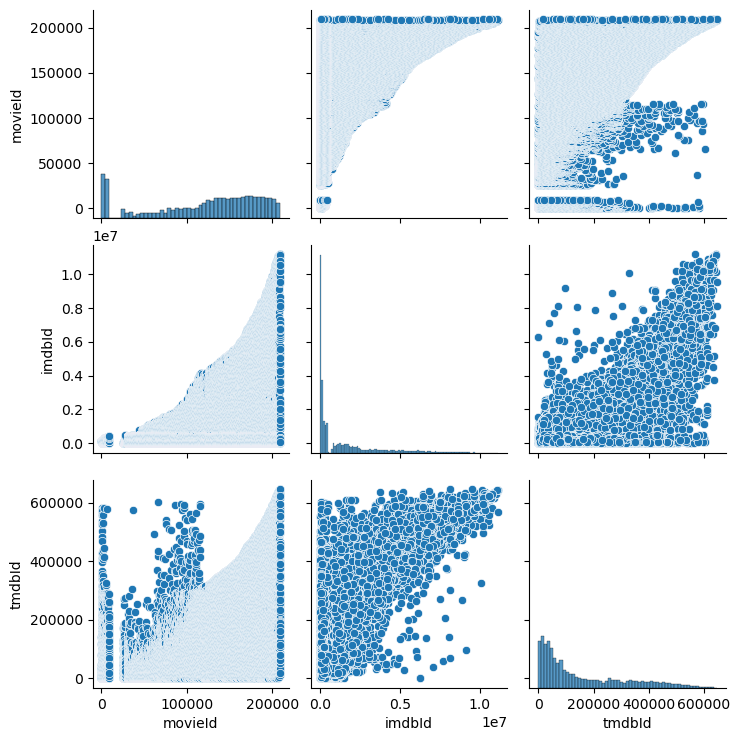

In [32]:
sns.pairplot(links_df)

In [6]:
columns = ['userid', 'rating', 'title', 'genre', 'timestamp']
#columns = ['ratings.userid, ratings.rating, ratings.movieid, movies.title, movies.genre, ratings.timestamp']
#columns = ['r.userid', 'r.rating', 'r.movieid AS rating_movieid', 'm.title', 'm.genre', 'r.timestamp']
condition = 'r.movieid = m.movieid'
rating = "ratings"
movie = "movies"

In [7]:
select_query = sql.SQL('SELECT {} FROM {} AS r LEFT JOIN movies AS m on r.movieId = m.movieId LIMIT 1000').format(
    sql.SQL(',').join(map(sql.Identifier, columns)),
    sql.Identifier(rating)
)

# f"SELECT userId, movieId, title, rating, genre, timestamp FROM ratings LEFT JOIN movies on ratings.movieId = movies.movieId LIMIT 3"
cursor.execute(select_query)
testData = cursor.fetchall()

In [8]:
final = []
def convertToDate(data):
    for date in data:
        conv = list(date)
        temp = conv[-1].strftime("%Y-%m-%d %H:%M:%S")
        conv[-1] = temp
        final.append(conv)
        
    return final

In [9]:
def covertToDf(data):
    return pd.DataFrame(data, index=None, columns=columns)

In [10]:
sub = convertToDate(testData)
df = covertToDf(sub)

In [11]:
max_rating = df.groupby('userid').mean()

In [12]:
max_rating

,rating
userid,
1,3.814286
2,3.630435
3,3.697409
4,3.638889


In [20]:
df['timestamp'].head()

0    2006-05-17 16:34:04
1    2006-05-17 13:26:57
2    2006-05-17 13:27:08
3    2006-05-17 16:13:40
4    2006-05-17 13:21:50
Name: timestamp, dtype: object

In [16]:
df['date'] = df['timestamp'].head(1000).apply(lambda x : x.split())[0]
df['time'] = df['timestamp'].head(1000).apply(lambda x : x.split())[1]

ValueError: Length of values (2) does not match length of index (1000)

In [28]:
temp = df['timestamp'].apply(lambda x : x.split())
#temp.apply(lambda d : d.split(','))

In [30]:
type(temp)

pandas.core.series.Series

In [299]:
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

In [249]:
conn.commit()
cursor.close()
conn.close()

In [189]:
cursor.close()